# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics

# Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Projects/Data/MLLRP3_insurance_prediction.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

# Data Exploration and pre-processing 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Data Visualization

Text(0.5, 1.0, 'Agewise_Children')

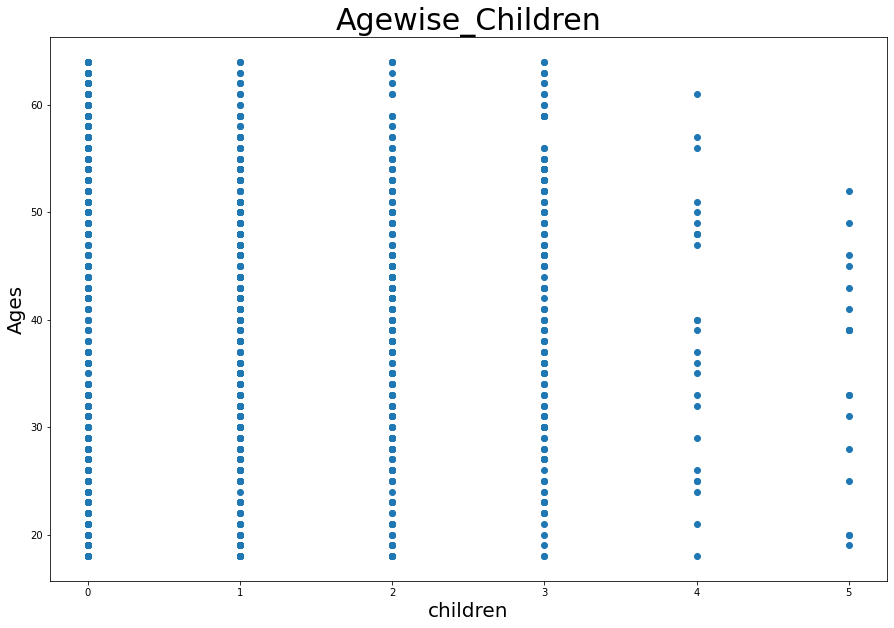

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter('children','age',data=df)
plt.xlabel('children',fontsize=20)
plt.ylabel('Ages',fontsize=20)
plt.title('Agewise_Children',fontsize=30)

Text(0.5, 1.0, 'Agewise_Charges')

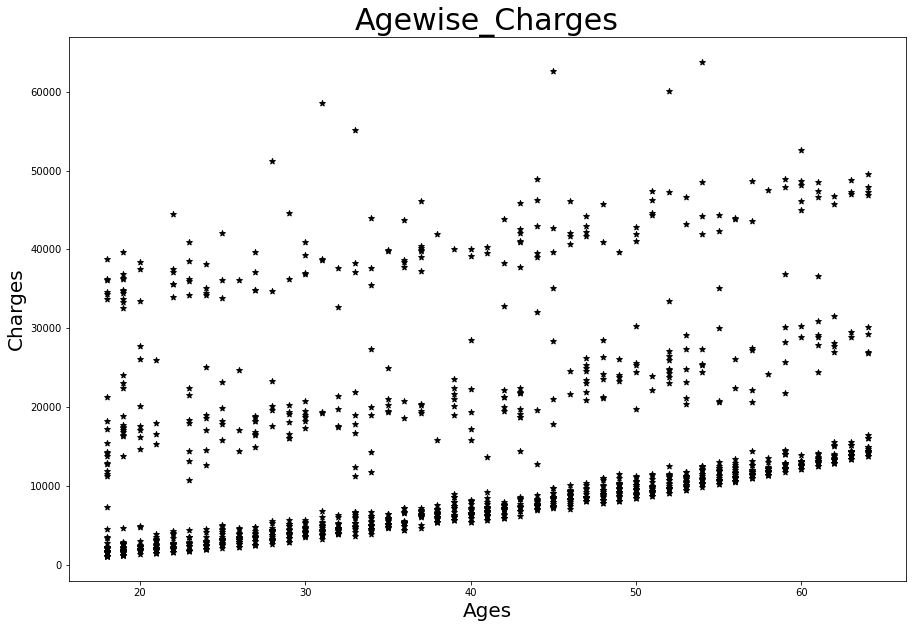

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter('age','charges',data=df,marker='*',color='black')
plt.xlabel('Ages',fontsize=20)
plt.ylabel('Charges',fontsize=20)
plt.title('Agewise_Charges',fontsize=30)

In [ ]:
bmic=df.groupby(['children'])['bmi'].mean().reset_index()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


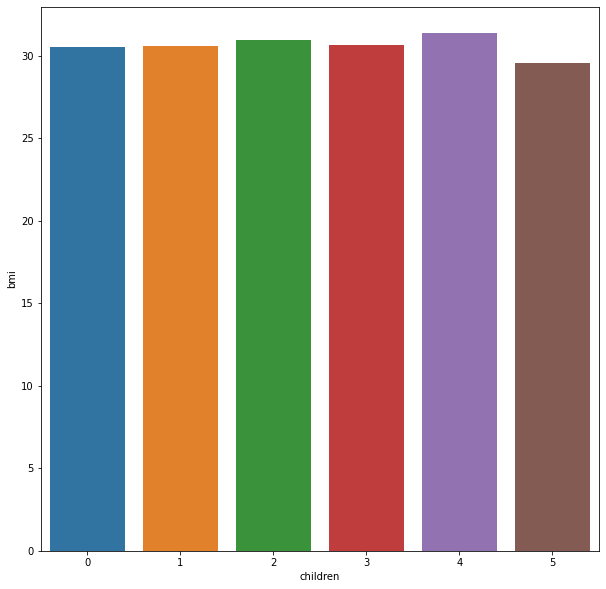

In [ ]:
import seaborn as sns 
plt.figure(figsize=(10,10))
sns.barplot('children','bmi',data=bmic)

## Feature Encoding of charecter column

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
dm=pd.get_dummies(df[['sex','smoker','region']],drop_first=True)
df1=pd.concat([df,dm],axis=1).drop(['smoker','sex','region'],axis=1)
df1

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [ ]:
# corrmat=df.corr()
# sns.set(font_scale=0.75)
# f, ax = plt.subplots(figsize=(8, 6))
# sns.heatmap(corrmat,annot=True,square=True,vmax=0.8)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


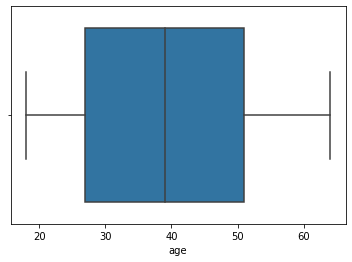

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


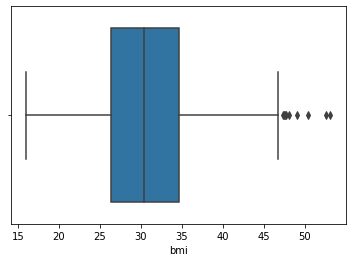

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


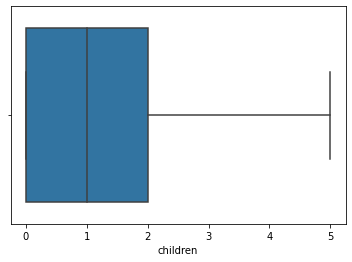

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


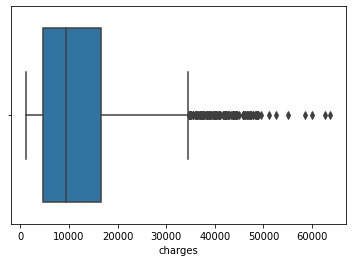

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


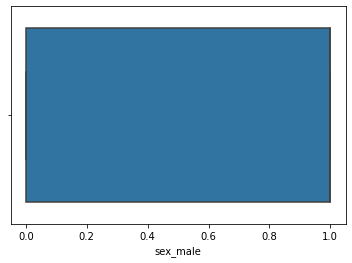

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


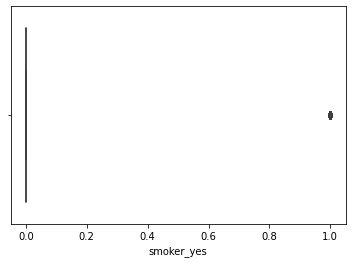

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


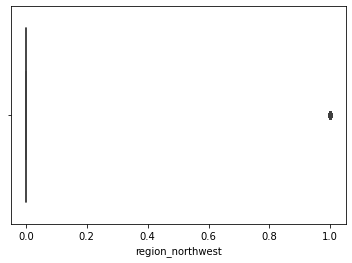

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


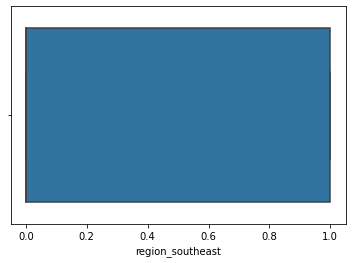

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


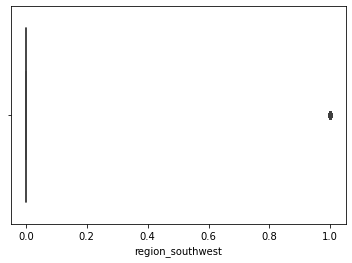

In [ ]:
for i in df1.columns:
  sns.boxplot(df1[i])
  plt.show()

In [ ]:
x=df1.drop(['charges'],axis=1)
y=df1['charges']

## Scaling


In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms=MinMaxScaler()
ss=StandardScaler()
t=ss.fit_transform(x)
x_sc=pd.DataFrame(t,columns=x.columns)
x_sc

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,-1.010519,1.970587,-0.566418,-0.611324,1.765481
1,-1.509965,0.509621,-0.078767,0.989591,-0.507463,-0.566418,1.635795,-0.566418
2,-0.797954,0.383307,1.580926,0.989591,-0.507463,-0.566418,1.635795,-0.566418
3,-0.441948,-1.305531,-0.908614,0.989591,-0.507463,1.765481,-0.611324,-0.566418
4,-0.513149,-0.292556,-0.908614,0.989591,-0.507463,1.765481,-0.611324,-0.566418
...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,0.989591,-0.507463,1.765481,-0.611324,-0.566418
1334,-1.509965,0.206139,-0.908614,-1.010519,-0.507463,-0.566418,-0.611324,-0.566418
1335,-1.509965,1.014878,-0.908614,-1.010519,-0.507463,-0.566418,1.635795,-0.566418
1336,-1.296362,-0.797813,-0.908614,-1.010519,-0.507463,-0.566418,-0.611324,1.765481


## Split the Model

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sc,y,test_size=0.2,random_state=54)

# Working with model

## Linear Regression Model


In [ ]:

from sklearn import linear_model


reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)
prd=reg.predict(x_test)
print('tr_s\n',reg.score(x_train,y_train))
print('tst_s\n',reg.score(x_test,y_test))
print('Slope:\n',reg.coef_)
print('intercept:\n',reg.intercept_) 
print('MSE:\n',metrics.mean_squared_error(y_test,prd))
print('Mean Absolute Error:\n',metrics.mean_absolute_error(y_test,prd))
print('RMSE:\n',metrics.mean_squared_error(y_test,prd,squared=False))
print('R2 score:\n',metrics.r2_score(y_test,prd))

tr_s
 0.7709208753260598
tst_s
 0.6513904645475206
Slope:
 [3687.44785762 1917.31085187  586.48742841  -47.13118765 9793.45703808
 -390.77919828 -347.37834909 -475.5528393 ]
intercept:
 13364.557251793836
MSE:
 44725150.19220354
Mean Absolute Error:
 4602.681569298106
RMSE:
 6687.686460369052
R2 score:
 0.6513904645475206


### Regularization

In [ ]:
from sklearn.linear_model import Ridge,Lasso
def regularization(ra=100,la=100):
  rr=Ridge(alpha=ra,max_iter=100000)
  rr.fit(x_train,y_train)
  print('Ridge_Train_score:\n',rr.score(x_train,y_train))
  print('Ridge_Test_score:\n',rr.score(x_test,y_test))
  ls=Lasso(alpha=la,max_iter=100000)
  ls.fit(x_train,y_train)
  print('Lasso_Train_score:\n',ls.score(x_train,y_train))
  print('Lasso_Test_score:\n',ls.score(x_test,y_test))
regularization()

Ridge_Train_score:
 0.7653869732752008
Ridge_Test_score:
 0.6572209449668516
Lasso_Train_score:
 0.7700104339134918
Lasso_Test_score:
 0.6525347785894164


Classification Models

## Cross Validation

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [ ]:
model = [LinearRegression,DecisionTreeRegressor,RandomForestRegressor,KNeighborsRegressor,XGBRFRegressor]

for mod in model:
    reg = mod()
    reg = reg.fit(x_train,y_train)
    print(mod , 'accuracy',reg.score(x_test,y_test))

<class 'sklearn.linear_model._base.LinearRegression'> accuracy 0.6513904645475206
<class 'sklearn.tree._classes.DecisionTreeRegressor'> accuracy 0.625788738324838
<class 'sklearn.ensemble._forest.RandomForestRegressor'> accuracy 0.7787597122501821
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> accuracy 0.750993618652071
[04:45:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
<class 'xgboost.sklearn.XGBRFRegressor'> accuracy 0.7807924927783103


In [ ]:
from sklearn.model_selection import KFold,cross_val_score
models = []
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('XGB', XGBRFRegressor()))
models.append(('LR', LinearRegression()))
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10)
    cv_result =cross_val_score(model,x_train,y_train,cv=kfold)
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

[04:45:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

## Hyperparameter Tuning

In [ ]:
model=RandomForestRegressor()
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


rf_random = RandomizedSearchCV(estimator = model, 
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5,
                               verbose=2,
                               random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

### best parameter

In [ ]:
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 5,
 'n_estimators': 700}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(max_depth=20,max_features='auto',min_samples_leaf=10,min_samples_split=5,n_estimators=700)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7952761128315876